In [1]:
##### 한글폰트 쓰려면
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\Windows\Fonts\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Playdata\AppData\Local\Temp\ipykernel_2616\22807469.py:5: SyntaxWarning: invalid escape sequence '\W'
  font_path = 'C:\Windows\Fonts\gulim.ttc'


### matplotlib 차트 유형
1. histogram : 연속형값의 도수(빈도수/개수) 파악
2. bar plot : 범주형값의 개수, 또는 다른 연속값을 파악
3. scatter plot : 산포도(산점도) 두 연속값들의 분포 파악
4. line plot : 시계열데이터(연속값) 변화 파악
5. box plot : 연속형 값의 사분위, 이상치 파악
6. pie chart : 전체 범위 중의 비율

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Histogram
- 연속형 값을 일정 구간을 나누어 구간별 데이터포인트의 빈도를 시각화
   - x축: 연속형 데이터
   - y축: 구간별 데이터포인트의 개수 (합)
   

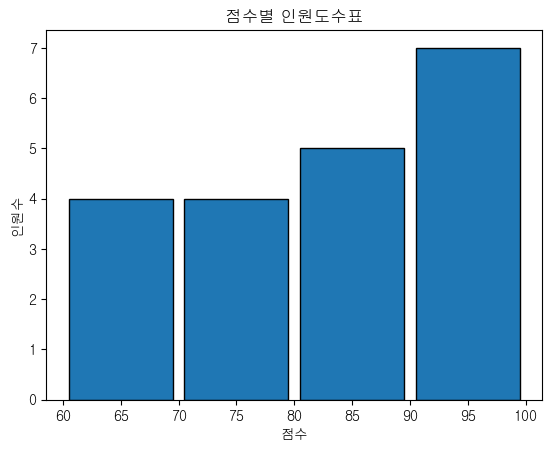

In [3]:
# bins: 나뉠 구간의 갯수 (기본10)

scores = [100, 95, 97, 98, 99, 
          90, 80, 81, 84, 88, 
          70, 78, 79, 70, 65, 
          66, 61, 64, 100, 89]

bins = [60, 70, 80, 90, 100]

plt.hist(scores, bins=bins, edgecolor='black', rwidth=0.90)
plt.xlabel('점수')
plt.ylabel('인원수')
plt.title('점수별 인원도수표')
plt.show()

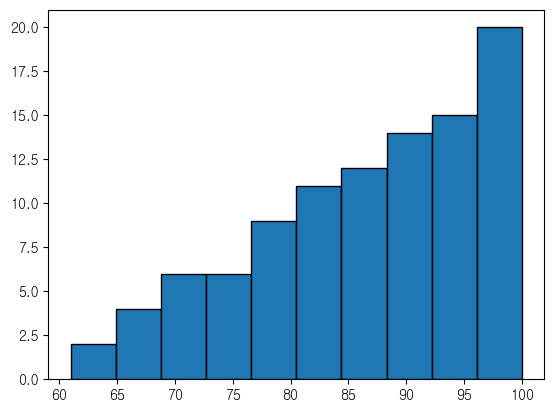

In [4]:
# cumulative
plt.hist(scores, edgecolor='black', rwidth=1, cumulative=True)
plt.show()

In [5]:
import os
print(os.getcwd())  # 현재 작업 디렉터리

c:\SKN_19\python_basic\14_matplot


In [6]:
df = pd.read_csv('../data/crypto_daily_returns.csv')
df.head(10)

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.0,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
5,9/22/2014,0.835210,NaN,-0.084083
6,9/23/2014,8.364742,NaN,11.885394
7,9/24/2014,-2.888081,NaN,-1.680795
8,9/25/2014,-2.748309,NaN,-3.260060
9,9/26/2014,-1.736994,NaN,-1.795487


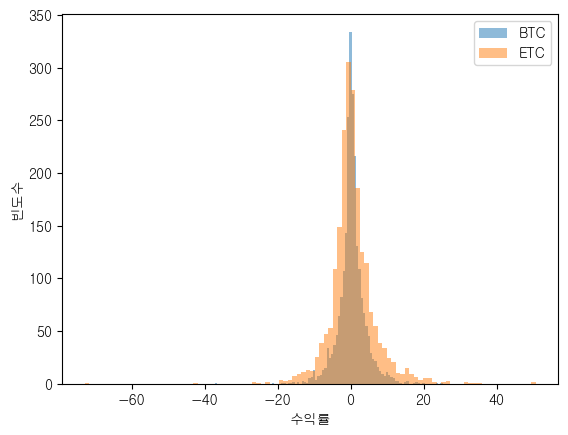

In [8]:
plt.hist(df['BTC'], bins=100, label='BTC', alpha=0.5)
plt.hist(df['ETH'], bins=100, label='ETC', alpha=0.5)
plt.legend()

plt.xlabel('수익률')
plt.ylabel('빈도수')
plt.show()

##### bar plot
- 막대 차트
- 범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화
    - x축 : 범주형 데이터 카테고리
    - y축 : 연속형 데이터 (총합, 평균)

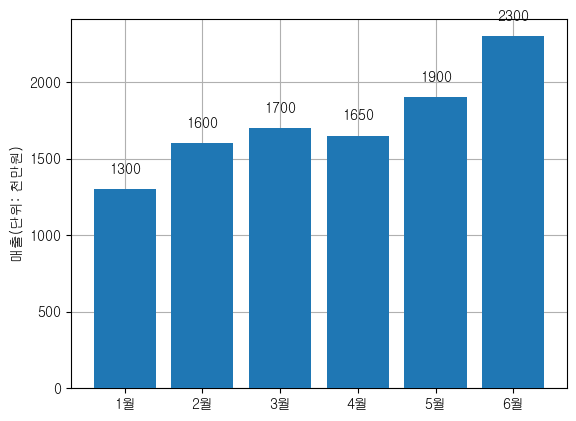

In [22]:
# 월별 매출 데이터
df = pd.DataFrame({
    'months': ['1월', '2월', '3월', '4월', '5월', '6월'],
    'sales': [1300, 1600, 1700, 1650, 1900, 2300]
})

# x축 위치, y축 위치, 텍스트, 텍스트 정렬위치
for i, val in enumerate(df['sales']):
    plt.text(i, val +100, str(val), ha='center')

# zorder: z축 설정 (클수록 앞)
plt.bar(df['months'], df['sales'], zorder=10)
plt.ylabel('매출(단위: 천만원)')
plt.grid(zorder=1)
plt.show()

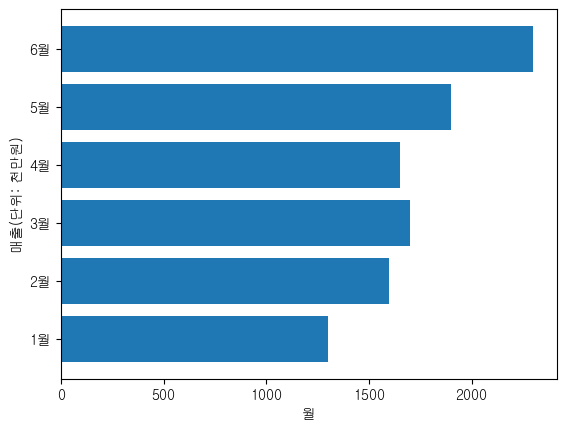

In [31]:
# barh 수평막대
# - x축: 연속형
# - y축: 밤주형

plt.barh(df['months'], df['sales'])

plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')
plt.show()

In [24]:
beers_df = pd.read_csv('../data/beers.csv')
beers_df

,beer_name,beer_type,country
0,Heineken,Pale Lager,Netherlands
1,Guinness,Stout,Ireland
2,Corona Extra,Pale Lager,Mexico
3,Stella Artois,Pilsner,Belgium
4,Budweiser,Pale Lager,USA
5,Hoegaarden,Witbier,Belgium
6,Carlsberg,Pale Lager,Denmark
7,Sapporo,Lager,Japan
8,Asahi,Lager,Japan
9,Becks,Pilsner,Germany


country
Belgium        4
Denmark        1
Germany        1
Ireland        1
Japan          2
Mexico         1
Netherlands    1
USA            1
Name: beer_name, dtype: int64


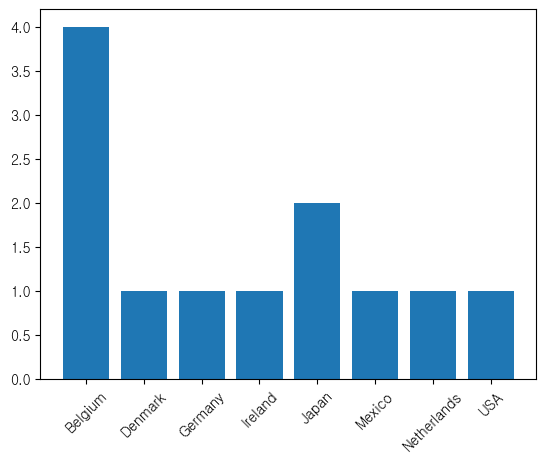

In [ ]:
beer_df_groupby = beers_df.groupby('country')['beer_name'].count()
print(beer_df_groupby)

plt.bar(beer_df_groupby.index, beer_df_groupby)
plt.xticks(rotation=45)
plt.show()

country
Belgium        4
Denmark        1
Germany        1
Ireland        1
Japan          2
Mexico         1
Netherlands    1
USA            1
Name: beer_name, dtype: int64


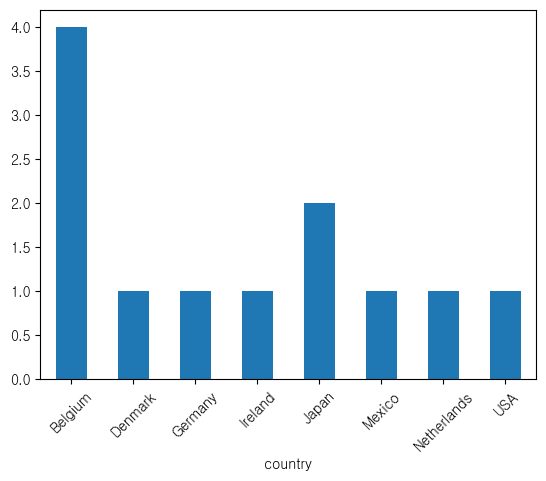

In [40]:
beer_df_groupby = beers_df.groupby('country')['beer_name'].count()
print(beer_df_groupby)

# histogram
# plt.hist(beers_df['country'], bins=beers_df['country'].nunique(), rwidth=0.9)

# Series/DataFrame 기준으로 plot
beer_df_groupby.plot(kind='bar')

plt.xticks(rotation=45)
plt.show()

##### line plot
- 시계열 데이터에서 변화하는 값의 추이를 시각화
    - x축 : 연속형 데이터
    - y축 : 연속형 데이터

In [43]:
# 주가 추이
df = pd.DataFrame({
    'Date' : pd.date_range(start='2025-01-01', periods=14, freq='D'),
    'APPL': np.random.randint(100, 150, 14),
    'MSFT': np.random.randint(100, 150, 14)
})
df

,Date,APPL,MSFT
0,2025-01-01,115,112
1,2025-01-02,114,113
2,2025-01-03,108,102
3,2025-01-04,103,119
4,2025-01-05,141,116
5,2025-01-06,105,107
6,2025-01-07,119,108
7,2025-01-08,142,109
8,2025-01-09,133,102
9,2025-01-10,120,142


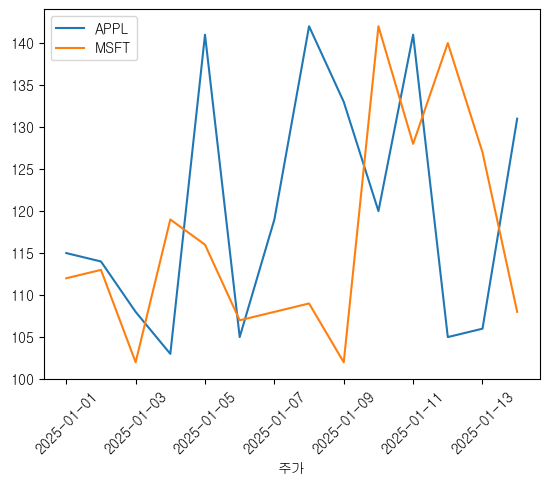

In [45]:
plt.plot(df['Date'], df['APPL'], label='APPL')
plt.plot(df['Date'], df['MSFT'], label='MSFT')

plt.xlabel('날짜')
plt.xlabel('주가')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Text(0, 0.5, '주가')

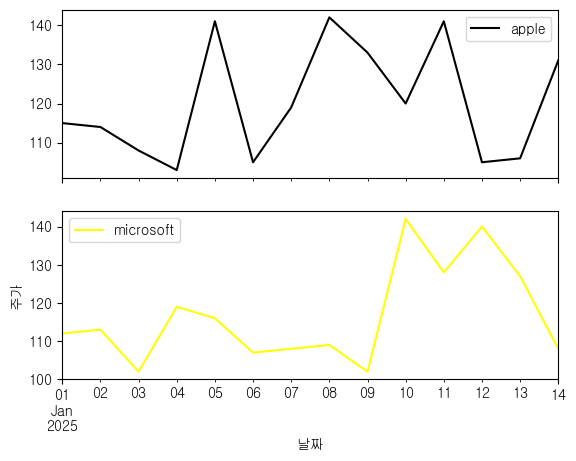

In [ ]:
df.plot(
    x='Date',
    y=['APPL', 'MSFT'],
    color=['black', 'yellow'],
    label=['apple', 'microsoft'], # legend없어도 표시함
    subplots=True # 없으면 합쳐져서 하나로
)

plt.xlabel('날짜')
plt.ylabel('주가')

In [50]:
df = pd.DataFrame(pd.read_csv('../data/crypto_daily_prices.csv'))
df

,Date,BTC-USD Price,ETH-USD Price,LTC-USD Price
0,9/17/2014,457.334015,NaN,5.058550
1,9/18/2014,424.440002,NaN,4.685230
2,9/19/2014,394.795990,NaN,4.327770
3,9/20/2014,408.903992,NaN,4.286440
4,9/21/2014,398.821014,NaN,4.245920
...,...,...,...,...
2380,3/28/2021,55950.746090,1691.355957,185.028488
2381,3/29/2021,57750.199220,1819.684937,194.474777
2382,3/30/2021,58917.691410,1846.033691,196.682098
2383,3/31/2021,58918.832030,1918.362061,197.499100


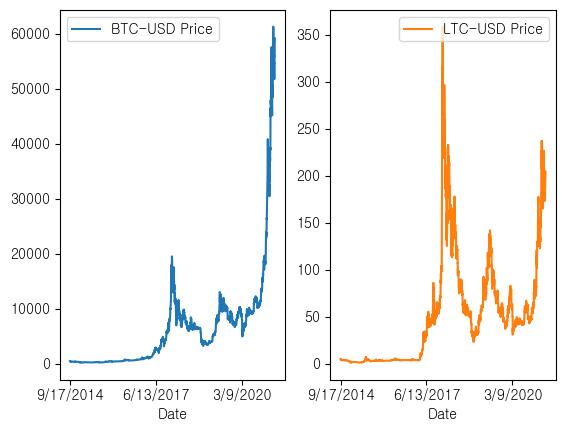

In [53]:
df.plot(
    x='Date',
    y=['BTC-USD Price', 'LTC-USD Price'],
    subplots=True,
    layout=(1, 2)
)
plt.show()

##### Scatter plot
- 두 축의 변수 관계를 시각화
- 두 변수 간 상관관계, 클러스터링, 이상치 파악에 도움

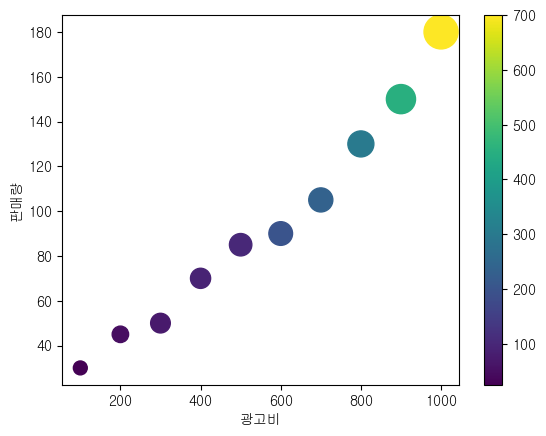

In [58]:
df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})


plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c=df['colors'])

plt.colorbar()
plt.xlabel('광고비')
plt.ylabel('판매량')
plt.show()

##### Pie Chart
- 전체에서 각 부분이 기여하는 비율을 시각화

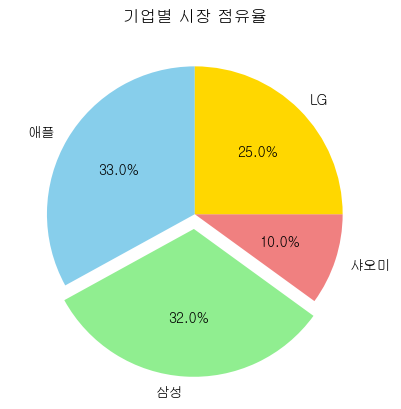

In [60]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    
})

plt.pie(
    df['market_share'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode= [0, 0.1, 0, 0],
    colors=['skyblue', 'lightgreen', 'lightcoral', 'gold']
)

plt.title('기업별 시장 점유율')
plt.show()

##### Box Plot
- 연속형 데이터의 분포를 사분위수로 시각화
- 이상치 outlier를 도출하는 데에 효과적
     - x축: 이산값(범주형) 데이터
     - y축: 연속형 데이터
     
     
- 표현되는 값들
    - max, Q3, Q2, Q1, min: 최대값, 3분위수(75%), 2분위수(50%, 중위값), 1분위수(25%), 최소값
    - IQR (Inter-quartile Range) : 사분범위

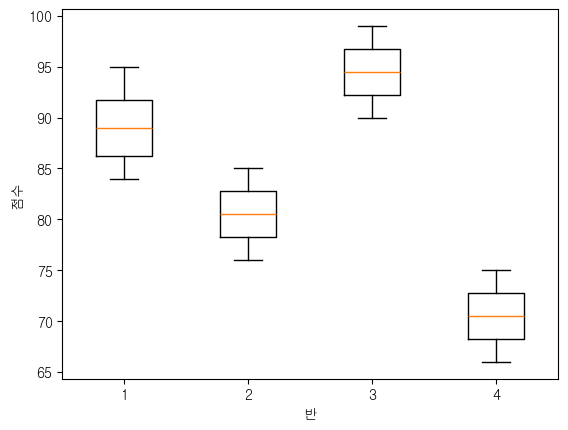

In [61]:
# 반별 시험 성적 데이터 (2차원 배열)
class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

plt.boxplot(class_scores)


plt.xlabel('반')
plt.ylabel('점수')
plt.show()

In [63]:
data = class_scores[0]

print('최소값:', np.min(data))
print('사분위수(Q1):', np.percentile(data, 25))
print('사분위수(Q2):', np.percentile(data, 50), np.median(data))
print('사분위수(Q3):', np.percentile(data, 75))
print('최대값:', np.max(data))

최소값: 84
사분위수(Q1): 86.25
사분위수(Q2): 89.0 89.0
사분위수(Q3): 91.75
최대값: 95


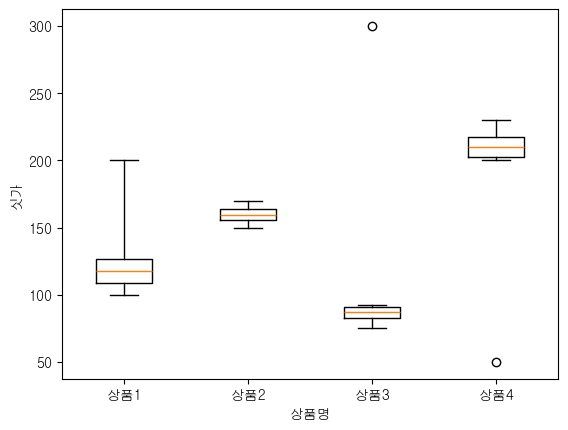

In [64]:
weird_data = [
    [100, 120, 130, 110, 115, 105, 125, 200],   # 이상치 200   
    [150, 160, 170, 155, 165, 158],
    [80, 85, 90, 75, 92, 87, 300],   # 이상치 300
    [200, 220, 210, 205, 215, 230, 50]  # 이상치 50    
]

# whis 기본값 : 1.5
# [참고] 수염의 길이 계산 공식 : [Q1 - whis * IQR, Q3 + whis * IQR]
# [참고] IQR = Q3 - Q1
plt.boxplot(weird_data, whis=5)
plt.xticks([1, 2, 3, 4], ['상품1', '상품2', '상품3', '상품4'])
plt.xlabel('상품명')
plt.ylabel('싯가')
plt.show()
